In [2]:
import numpy as np

In [1]:
class SGD:
    def __init__(self,lr=0.01):
        self.lr=lr
    def update(self,params,grads):
        for key in params.keys():
            params[key] -= self.lr*grads[key]


In [3]:
class Momentum:
    def __init__(self,lr=0.01,momentum=0.9):
        self.lr=lr
        self.momentum=momentum
        self.v=None
    def update(self,params,grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
        for key in params.keys():
            self.v[key] = self.momentum*self.v[key]-self.lr*grads[key]
            params[key]+=self.v[key]

In [ ]:
class AdaGrad:
    def __init__(self,lr=0.01):
        self.lr=lr
        self.h = None
    def update(self,params,grads):
        if self.h is None:
            self.h = {}
        for key, val in params.items():
            self.h[key] = np.zeros_like(val)
        for key in params.keys():
            self.h[key] += grads[key]*grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key])+1e-7)
            #做除数的时候需要注意的点，保证除数不能为0

In [7]:
#不可以将神经网络的初始权重设定为0的小实验 对应书中176页
def sigmoid(x):
    return 1 / (1+np.exp(-x))
#构造输入
#两个样本，每个样本两个维度
X = np.array([[1,2],
              [3,4]])

#情况1：权重全为0
W1=np.zeros((2,2))
b1=np.zeros((2,))
h1=sigmoid(X.dot(W1)+b1)

W2=np.zeros((2,2))
b2=np.zeros((2,))
out2=sigmoid(h1.dot(W2)+b2)

print("情况1初始权重设定为0，隐藏层输出结果：",h1)
print("情况1初始权重设定为0，最终输出结果：",out2)



情况1初始权重设定为0，隐藏层输出结果： [[0.5 0.5]
 [0.5 0.5]]
情况1初始权重设定为0，最终输出结果： [[0.5 0.5]
 [0.5 0.5]]


把神经网络所有权重都初始化为 0，在 前向传播 时，所有神经元得到的输入都一样（因为 𝑊=0，所以每个神经元计算出来的结果都是相同的），也就是上面结果的0.5

同时，在反向传播时，权重梯度的偏导数矩阵的每一列都是平行的，而每一列的含义是： 损失函数对第j个神经元权重向量的敏感程度，影响了后面的更新

In [8]:
np.random.seed(42)
np.random.randn(2,2)
print(np.random.rand(2,2))

[[0.15601864 0.15599452]
 [0.05808361 0.86617615]]


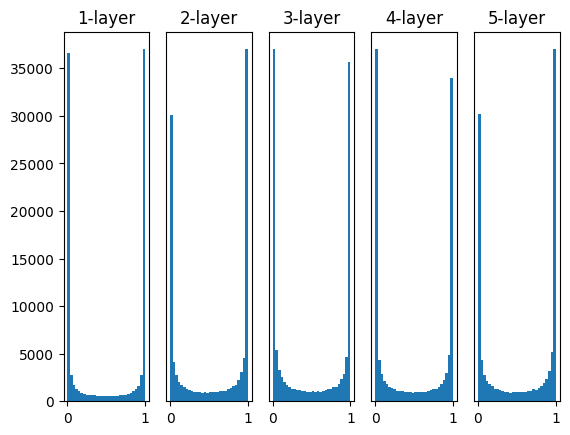

In [3]:
#weight_activation
import numpy as np
import matplotlib.pyplot as plt
def sigmoid(x):
    return 1 / (1+np.exp(-x))
input_data = np.random.randn(1000,100)
node_num = 100
hidden_layer_size = 5
activations = {} #激活值保存在这个字典里面

x = input_data

for i in range(hidden_layer_size):
    if i!=0:
        x=activations[i-1] #前一层的输出作为当前层的输入
    w=np.random.randn(node_num,node_num)*1 #第一种初始化权重的方案
    a=np.dot(x,w)
    z=sigmoid(a)
    activations[i]=z #可以注意这个activations字典结构，一个key对应的是一个二维矩阵
#绘制直方图
for i,a in activations.items():
    plt.subplot(1,len(activations),i+1)
    plt.title(str(i+1)+'-layer')
    if i!=0:plt.yticks([],[])
    plt.hist(a.flatten(),30,range=(0,1))
plt.show()
    


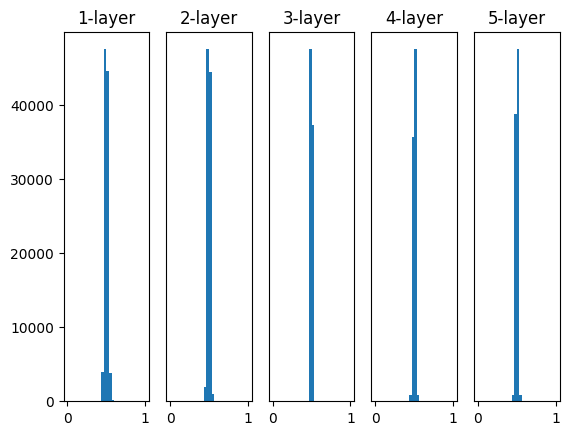

In [4]:
for i in range(hidden_layer_size):
    if i!=0:
        x=activations[i-1] #前一层的输出作为当前层的输入
    w=np.random.randn(node_num,node_num)*0.01 #第2种初始化权重的方案
    a=np.dot(x,w)
    z=sigmoid(a)
    activations[i]=z #可以注意这个activations字典结构，一个key对应的是一个二维矩阵
#绘制直方图
for i,a in activations.items():
    plt.subplot(1,len(activations),i+1)
    plt.title(str(i+1)+'-layer')
    if i!=0:plt.yticks([],[])
    plt.hist(a.flatten(),30,range=(0,1))
plt.show()